We will use this notebook to calculate and visualize statistics of our chess move dataset. This will allow us to better understand our limitations and help diagnose problems we may encounter down the road when training/defining our model.

In [1]:
import pdb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_move_freqs(moves, sort=True):
    freq_dict = {}
    for move in moves:
        if move not in freq_dict:
            freq_dict[move] = 0
        freq_dict[move] = freq_dict[move] + 1
    tuples = [(w, c) for w, c in freq_dict.items()]
    if sort:
        tuples = sorted(tuples, key=lambda x: -x[1])
    return (tuples, moves)

def plot_frequency(counts, move_limit=1000):
    # limit to the n most frequent moves
    n = 1000
    counts = counts[0:n]
    # from: http://stackoverflow.com/questions/30690619/python-histogram-using-matplotlib-on-top-words
    moves = [x[0] for x in counts]
    values = [int(x[1]) for x in counts]
    bar = plt.bar(range(len(moves)), values, color='green', alpha=0.4)

    plt.xlabel('Move Index')
    plt.ylabel('Frequency')
    plt.title('Move Frequency Chart')

    plt.show()
    
def plot_uniq_over_count(moves, interval=0.01):
    
    xs, ys = [], []
    for i in range(0, len(moves), int(len(moves) * interval)):
        chunk = moves[0:i]
        uniq = list(set(chunk))
        xs.append(len(chunk))
        ys.append(len(uniq))
    
    plt.plot(xs, ys)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.xlabel('Moves')
    plt.ylabel('Unique Moves')
    plt.show()

def plot_game_lengths(game_lengths):
    
    xs = [g[0] for g in game_lengths]
    ys = [g[1] for g in game_lengths]
    
    bar = plt.bar(xs, ys, color='blue', alpha=0.4)

    plt.xlabel('Half-moves per game')
    plt.ylabel('Frequency')
    plt.title('Game Length')

    plt.show()
    
def plot_repeat_states(moves):
    
    uniq_states = {}
    moves_in_game = ''
    
    for move in moves:
        
        moves_in_game = moves_in_game + ' ' + move
            
        if moves_in_game not in uniq_states:
            uniq_states[moves_in_game] = 0
        
        uniq_states[moves_in_game] = uniq_states[moves_in_game] + 1
        
        if is_game_over_move(move):
            moves_in_game = ''
    
    vals = []
    d = {}
    
    for state, count in sorted(uniq_states.items(), key=lambda x: (-x[1], x[0])):
        vals.append((count, state))
#         move_count = len(state.split())
#         if move_count not in d:
#             d[move_count] = 0
#         d[move_count] = d[move_count] + 1
    
    vals.append([c for c, s in vals])
    
    plt.plot(vals)
    plt.xlim([0, 100])
    plt.xlabel('Board State')
    plt.ylabel('Frequency')
    plt.title('Frequency of Board State')
    plt.show()
    
#     vals = [(length, count) for length, count in sorted(d.items(), key=lambda x: -x[0])]
#     pdb.set_trace()
#     plt.bar(vals)
#     plt.xlim([0, 1000])
#     plt.xlabel('Moves in State')
#     plt.ylabel('Frequency')
#     print('{} uniq board states'.format(len(list(uniq_states.keys()))))
    
def get_game_lengths(moves):
    
    game_lengths = {}
    total_games = 0
    current_move = 1
    for move in moves:
        if is_game_over_move(move):
            if current_move not in game_lengths:
                game_lengths[current_move] = 0
            game_lengths[current_move] = game_lengths[current_move] + 1
            current_move = 1
            total_games = total_games + 1
        else:
            current_move = current_move + 1
    print(total_games)
    return [(k, v) for k, v in game_lengths.items()], total_games
            
def is_game_over_move(move):
    return move in ('0-1', '1-0', '1/2-1/2')

Load our concatonated moves data.

In [3]:
with open('../data/train_moves.txt', 'r') as f:
    moves = f.read().split(' ')
    print('{} moves loaded'.format(len(moves)))
    counts, moves = get_move_freqs(moves)
    game_lengths, total_games = get_game_lengths(moves)

10108811 moves loaded
126872


In [5]:
# plot_repeat_states(moves)

## Plot Move Frequency
Here we can see which moves appear most frequently in the dataset. These moves are the most popular moves played by chess champions.

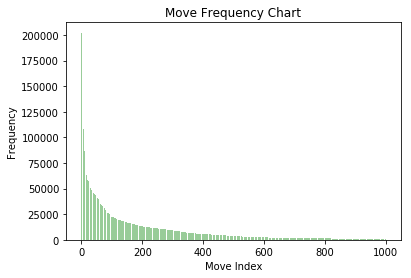

In [6]:
plot_frequency(counts)

We will list the most common few moves along with what percentage of the entire moves dataset this move represents.

In [7]:
top_n = 10
for w in counts[0:top_n]:
    print((w[0]).ljust(8), '{:.2f}%'.format((w[1]/len(moves)) * 100.00))

O-O      2.00%
Nf6      1.40%
Nf3      1.31%
d4       1.26%
Nc3      1.15%
d5       1.09%
e4       1.09%
c4       1.07%
c5       1.01%
e5       0.94%


## Plot Unique Moves
Here we compare the number of unique moves over the total move count. Take notice that the number of unique moves converges towards a constant as the number of total moves increase. This would suggest that there is a subset of all possible moves that actually make sense for a chess champion to play.

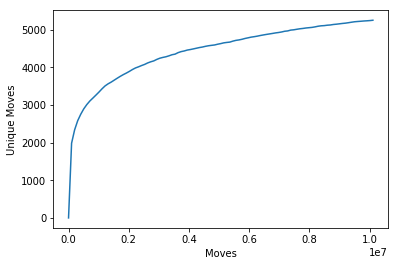

In [8]:
plot_uniq_over_count(moves)

## Plot Game Lengths

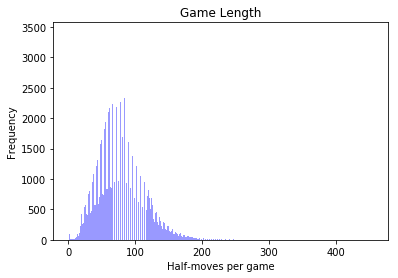

In [9]:
plot_game_lengths(game_lengths)

In [10]:
top_n = 10
sorted_lengths = sorted(game_lengths, key=lambda x: -x[1])
for l in sorted_lengths[0:top_n]:
    print((str(l[0])).ljust(8), '{:.3f}%'.format((l[1]/total_games) * 100.00))

82       2.684%
80       1.926%
84       1.843%
70       1.790%
78       1.784%
66       1.760%
68       1.747%
74       1.736%
76       1.725%
72       1.718%
